# Pandas 简介

**学习目标：**
* 大致了解 _pandas_ 库的 `DataFrame` 和 `Series` 数据结构
* 存取和处理 `DataFrame` 和 `Series` 中的数据
* 将 CSV 数据导入 pandas 库的 `DataFrame`
* 对 `DataFrame` 重建索引来随机打乱数据


[*pandas*](https://pandas.pydata.org/) 是一种列存数据分析 API。它是用于处理和分析输入数据的强大工具，很多机器学习框架都支持将 *pandas* 数据结构作为输入。虽然全方位介绍 *pandas* API 会占据很长篇幅，但它的核心概念非常简单，我们会在下文中进行说明。有关更完整的参考，请访问 [pandas 文档网站](https://pandas.pydata.org/pandas-docs/stable/index.html)，其中包含丰富的文档和教程资源。

## 基本概念

以下行导入了 *pandas* API 并输出了相应的 API 版本：

In [2]:
import pandas as pd
print(pd.__version__)

1.2.1


*pandas* 中的主要数据结构被实现为以下两类：
- **`DataFrame`**，您可以将它想象成一个关系型数据表格，其中包含多个行和已命名的列。
- **`Series`**, 它是单一列。`DataFrame` 中包含一个或多个 `Series`，每个 `Series` 均有一个名称。

数据框架是用于数据操控的一种常用抽象实现形式。[Spark](https://spark.apache.org/) 和 [R](https://www.r-project.org/about.html) 中也有类似的实现。

创建 `Series` 的一种方法是创建 `Series` 对象。例如：

In [3]:
pd.Series(['Wuhan', 'Dalian', 'Shenzhen'])

0       Wuhan
1      Dalian
2    Shenzhen
dtype: object

您可以将映射 `string` 列名称的 `dict` 传递到它们各自的 `Series`，从而创建 `DataFrame` 对象。如果 `Series` 在长度上不一致，系统会用特殊的 `NA/NaN` 值填充缺失的值。例如：

In [4]:
city_names = pd.Series(['Wuhan', 'Dalian', 'Shenzhen'])
population = pd.Series([14186500, 7002000, 12528300])
pd.DataFrame({'City name': city_names, 'Population': population})

,City name,Population
0,Wuhan,14186500
1,Dalian,7002000
2,Shenzhen,12528300


但是大多情况下，您需要将整个文件加载到 `DataFrame` 中。下面的示例加载了一个 包含加利福尼亚州住房数据的文件。如下所示：

In [7]:
california_housing_dataframe = pd.read_csv("../datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


上面的示例使用 `DataFrame.describe` 来显示关于 `DataFrame` 的统计信息。另一个实用函数是 `DataFrame.head`，它显示 `DataFrame` 的前几个记录：

In [8]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


*pandas* 的另一个强大功能是绘制图表。例如，借助 `DataFrame.hist`，可以快速了解一个列中值的分布：

array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

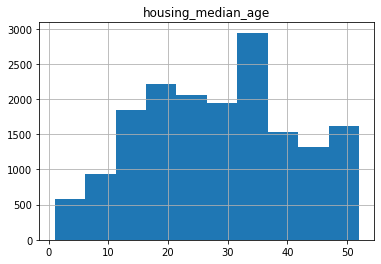

In [9]:
california_housing_dataframe.hist('housing_median_age')